In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from PyARMViz import PyARMViz
from PyARMViz.Rule import generate_rule_from_dict

TypeError: Parameters to generic types must be types. Got <module 'PyARMViz.Rule' from '/home/ogi/.local/lib/python3.10/site-packages/PyARMViz/Rule.py'>.

# Dataset Import

In [3]:
df = pd.read_csv('bread basket.csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


# Null Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


# Normalisasi Format Data Item

In [5]:
df['Item'] = df['Item'].str.lower()
df['Item'] = df['Item'].str.strip()

# Memecah Format Date Time

In [8]:
df['Datetime'] = pd.to_datetime(df['date_time'])
df['date'] = df['Datetime'].dt.date
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.weekday
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['day'].replace((0,1,2,3,4,5,6),
('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
df.drop(columns='date_time',inplace=True)
df.head()

/tmp/ipykernel_10476/4119268302.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['date_time'])


,Transaction,Item,period_day,weekday_weekend,Datetime,date,month,day,hour
0,1,bread,morning,weekend,2016-10-30 09:58:00,2016-10-30,10,Sunday,9
1,2,scandinavian,morning,weekend,2016-10-30 10:05:00,2016-10-30,10,Sunday,10
2,2,scandinavian,morning,weekend,2016-10-30 10:05:00,2016-10-30,10,Sunday,10
3,3,hot chocolate,morning,weekend,2016-10-30 10:07:00,2016-10-30,10,Sunday,10
4,3,jam,morning,weekend,2016-10-30 10:07:00,2016-10-30,10,Sunday,10


# Exploratory Analysis

## Transaksi berdasarkan jam

/tmp/ipykernel_10476/525518616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByHour['hour'], y=countByHour['Transaction'], palette = colors)


<Axes: xlabel='hour', ylabel='Transaction'>

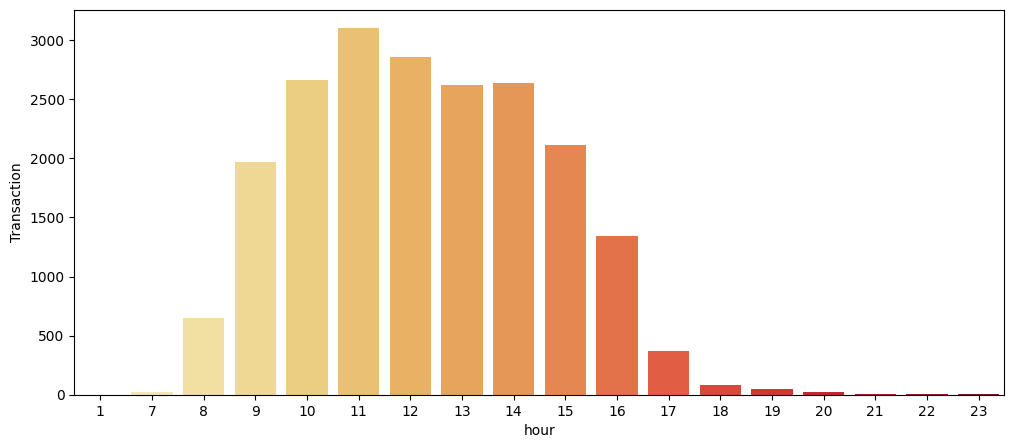

In [10]:
countByHour = df.groupby('hour')['Transaction'].count().reset_index()
countByHour.sort_values('hour',inplace=True)

colors = sns.color_palette("YlOrRd", 18)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByHour['hour'], y=countByHour['Transaction'], palette = colors)

## Transaksi per periode

/tmp/ipykernel_10476/2123636816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByDayPeriod['period_day'], y=countByDayPeriod['Transaction'], palette = colors)


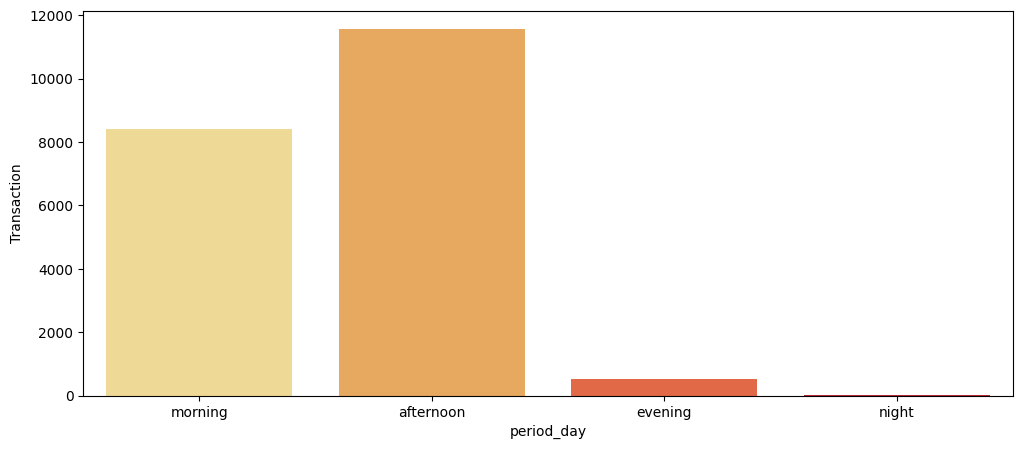

In [11]:
countByDayPeriod = df.groupby('period_day')['Transaction'].count().reset_index()
countByDayPeriod.loc[:,"orderOfDayPeriod"] = [1,2,0,3]
countByDayPeriod.sort_values('orderOfDayPeriod',inplace=True)

colors = sns.color_palette("YlOrRd", 4)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByDayPeriod['period_day'], y=countByDayPeriod['Transaction'], palette = colors)
plt.show()

## Transaksi per hari dalam seminggu

/tmp/ipykernel_10476/1417960960.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByDay['day'], y=countByDay['Transaction'], palette = colors)


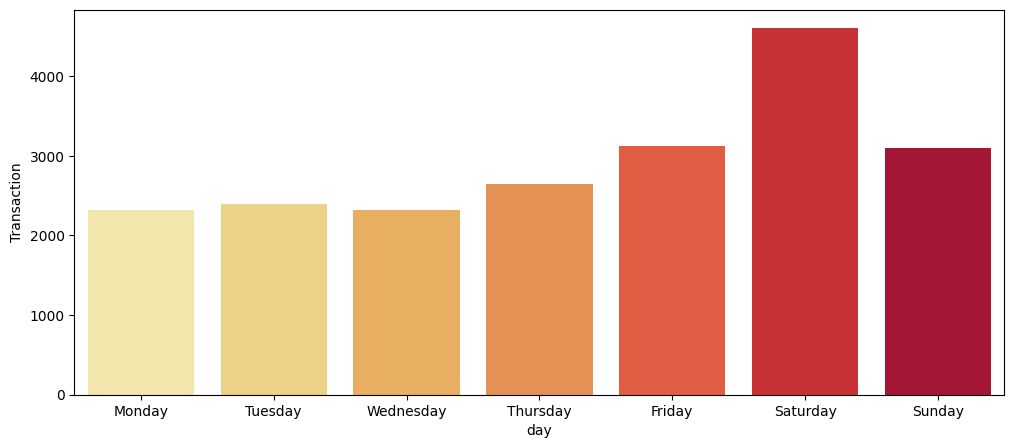

In [12]:
countByDay = df.groupby('day')['Transaction'].count().reset_index()
countByDay.loc[:,"orderOfDays"] = [4,0,5,6,3,1,2]
countByDay.sort_values("orderOfDays",inplace=True)

colors = sns.color_palette("YlOrRd", 7)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByDay['day'], y=countByDay['Transaction'], palette = colors)
plt.show()

## Transaksi per periode mingguan

/tmp/ipykernel_10476/3299786056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByWeekPeriod['weekday_weekend'], y=countByWeekPeriod['Transaction'], palette =


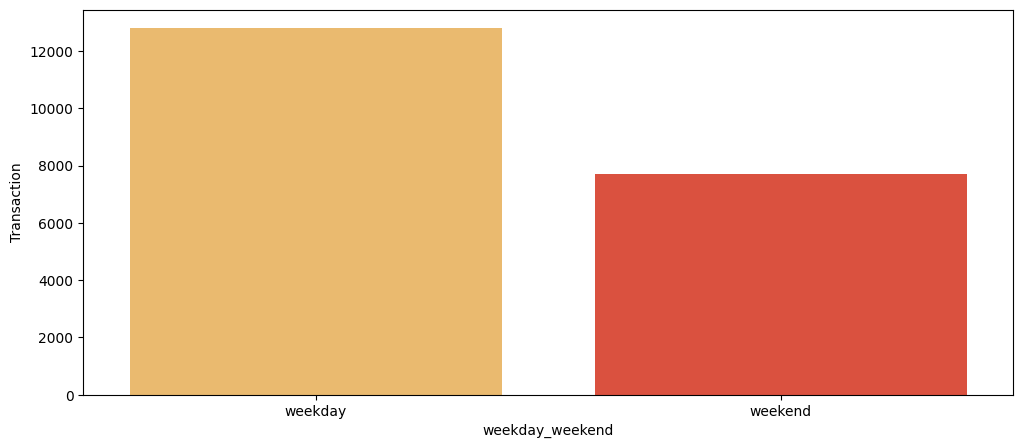

In [13]:
countByWeekPeriod = df.groupby('weekday_weekend')['Transaction'].count().reset_index()
countByWeekPeriod.sort_values('weekday_weekend',inplace=True)

colors = sns.color_palette("YlOrRd", 2)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByWeekPeriod['weekday_weekend'], y=countByWeekPeriod['Transaction'], palette =
colors)
plt.show()

## Transaksi berdasarkan bulan

/tmp/ipykernel_10476/108944284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByMonth['month'], y=countByMonth['Transaction'], palette = colors)
/tmp/ipykernel_10476/108944284.py:6: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  sns.barplot(x=countByMonth['month'], y=countByMonth['Transaction'], palette = colors)


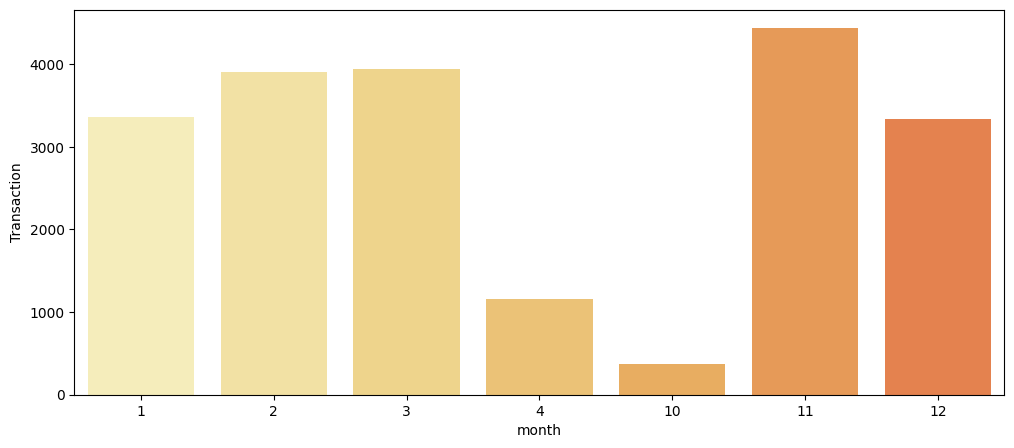

In [15]:
countByMonth = df.groupby('month')['Transaction'].count().reset_index()
countByMonth.sort_values('month',inplace=True)

colors = sns.color_palette("YlOrRd", 12)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByMonth['month'], y=countByMonth['Transaction'], palette = colors)
plt.show()

## Top 25 item terlaris

/tmp/ipykernel_10476/3102836934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = names, y = values, palette = colors)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'coffee'),
  Text(1, 0, 'bread'),
  Text(2, 0, 'tea'),
  Text(3, 0, 'cake'),
  Text(4, 0, 'pastry'),
  Text(5, 0, 'sandwich'),
  Text(6, 0, 'medialuna'),
  Text(7, 0, 'hot chocolate'),
  Text(8, 0, 'cookies'),
  Text(9, 0, 'brownie'),
  Text(10, 0, 'farm house'),
  Text(11, 0, 'muffin'),
  Text(12, 0, 'alfajores'),
  Text(13, 0, 'juice'),
  Text(14, 0, 'soup'),
  Text(15, 0, 'scone'),
  Text(16, 0, 'toast'),
  Text(17, 0, 'scandinavian'),
  Text(18, 0, 'truffles'),
  Text(19, 0, 'coke'),
  Text(20, 0, 'spanish brunch'),
  Text(21, 0, 'fudge'),
  Text(22, 0, 'baguette'),
  Text(23, 0, 'jam'),
  Text(24, 0, 'tiffin')])

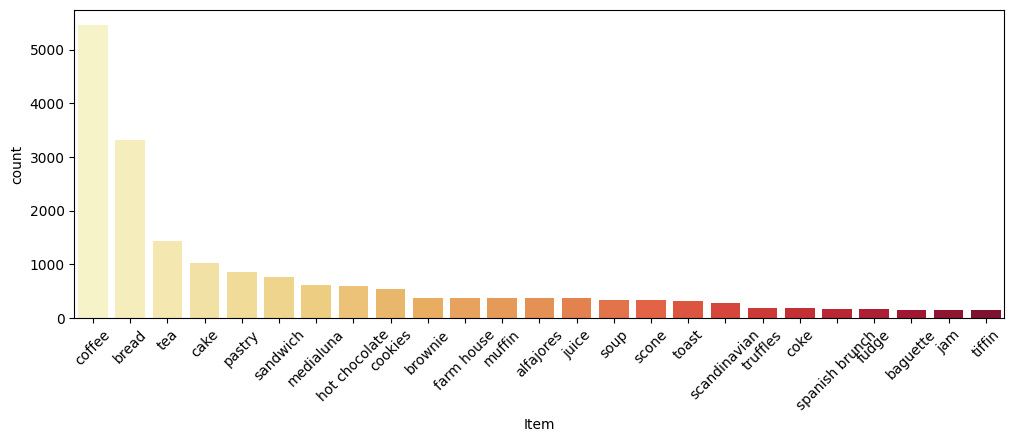

In [16]:
fig = plt.figure(figsize=(12,4))
colors = sns.color_palette("YlOrRd", 25)
names = df.Item.value_counts().head(25).index
values = df.Item.value_counts().head(25)
sns.barplot(x = names, y = values, palette = colors)
plt.xticks(rotation=45)

## Top sales berdasarkan periode hari

/tmp/ipykernel_10476/3989626839.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dfMorning.Item, y = dfMorning.Transaction, palette = colors)
/tmp/ipykernel_10476/3989626839.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dfAfternoon.Item, y = dfAfternoon.Transaction, palette = colors)
/tmp/ipykernel_10476/3989626839.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dfEvening.Item, y = dfEvening.Transaction, palette = colors)
/tmp/ipykernel_10476/3989626839.py:29: FutureWarning: 

Passing `palette` without assigning `

<Axes: title={'center': 'Top 10 orders in the night'}, xlabel='Item', ylabel='Transaction'>

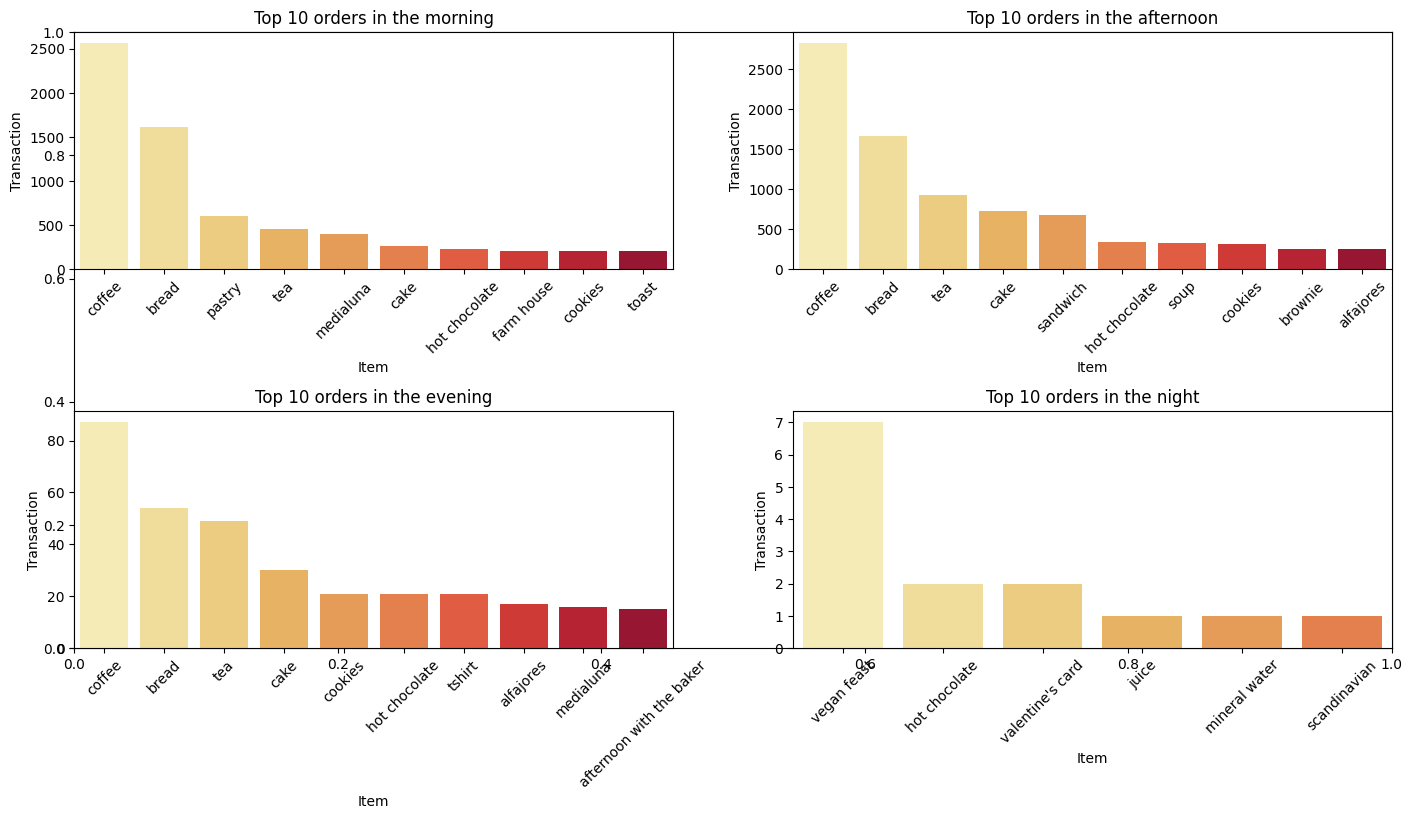

In [18]:
items = df.groupby(['Item','period_day'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)

colors = sns.color_palette("YlOrRd", 10)
fig = plt.subplots(figsize=(17,8))
plt.subplots_adjust(hspace = 0.6)

plt.subplot(2,2,1)
plt.xticks(rotation=45)
plt.title('Top 10 orders in the morning')
dfMorning = items[items['period_day']=='morning'].head(10)
sns.barplot(x = dfMorning.Item, y = dfMorning.Transaction, palette = colors)

plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.title('Top 10 orders in the afternoon')
dfAfternoon = items[items['period_day']=='afternoon'].head(10)
sns.barplot(x = dfAfternoon.Item, y = dfAfternoon.Transaction, palette = colors)

plt.subplot(2,2,3)
plt.xticks(rotation=45)
plt.title('Top 10 orders in the evening')
dfEvening = items[items['period_day']=='evening'].head(10)
sns.barplot(x = dfEvening.Item, y = dfEvening.Transaction, palette = colors)

plt.subplot(2,2,4)
plt.xticks(rotation=45)
plt.title('Top 10 orders in the night')
dfNight = items[items['period_day']=='night'].head(10)
sns.barplot(x = dfNight.Item, y = dfNight.Transaction, palette = colors)

## Top sales berdasarkan periode minggu

/tmp/ipykernel_10476/2569953401.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dfWeekday.Item, y = dfWeekday.Transaction, palette = colors)
/tmp/ipykernel_10476/2569953401.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dfWeekend.Item, y = dfWeekend.Transaction, palette = colors)


<Axes: title={'center': 'Top 10 orders in weekends'}, xlabel='Item', ylabel='Transaction'>

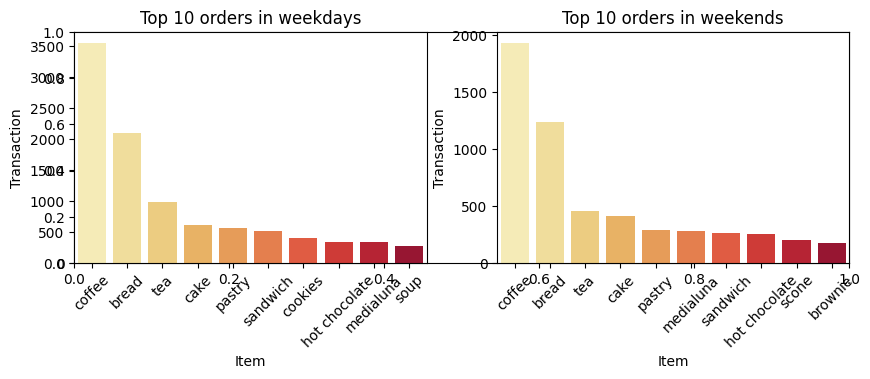

In [19]:
items2 = df.groupby(['Item','weekday_weekend'])['Transaction'].count().reset_index().sort_values(['weekday_weekend','Transaction'],ascending=False)

colors = sns.color_palette("YlOrRd", 10)
fig = plt.subplots(figsize=(10,3))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('Top 10 orders in weekdays')
dfWeekday = items2[items2['weekday_weekend']=='weekday'].head(10)
sns.barplot(x = dfWeekday.Item, y = dfWeekday.Transaction, palette = colors)

plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('Top 10 orders in weekends')
dfWeekend = items2[items2['weekday_weekend']=='weekend'].head(10)
sns.barplot(x = dfWeekend.Item, y = dfWeekend.Transaction, palette = colors)

# Apriori

## Transformasi dataset

In [21]:
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Number of Items')
table = transactions.pivot_table(index='Transaction', columns='Item', values='Number of Items',
aggfunc='sum').fillna(0)
table.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Encoding

In [25]:
def hot_encode(x): 
    if(x==0): return 0 
    if(x>0): return 1
apriori_data = df.groupby(['Transaction','Item'])['Item'].count().reset_index(name ='Count')
apriori_basket = apriori_data.pivot_table(index = 'Transaction', columns = 'Item', values = 'Count', aggfunc ='sum').fillna(0)
apriori_basket_set = apriori_basket.applymap(hot_encode)
apriori_basket_set.head()

/tmp/ipykernel_10476/2109545945.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  apriori_basket_set = apriori_basket.applymap(hot_encode)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pencarian frequent itemset berdasarkan support

In [26]:
frequence = apriori(apriori_basket_set, min_support=0.01, use_colnames=True)
rules = association_rules(frequence, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

/home/ogi/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


## Pencarian frequent itemset berdasarkan lift

In [27]:
apriori_rules = association_rules(frequence, metric = 'lift', min_threshold = 0.01)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
53,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
48,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
37,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
40,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
3,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
...,...,...,...,...,...,...,...,...,...,...
61,(bread),"(cake, coffee)",0.327205,0.054728,0.010037,0.030675,0.560497,-0.007870,0.975186,-0.538209
66,(coffee),"(pastry, bread)",0.478394,0.029160,0.011199,0.023410,0.802807,-0.002751,0.994112,-0.320149
49,(coffee),(spanish brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682,0.385594
60,(coffee),"(cake, bread)",0.478394,0.023349,0.010037,0.020981,0.898557,-0.001133,0.997581,-0.177928


## Visualisasi heatmap nilai lift antar item

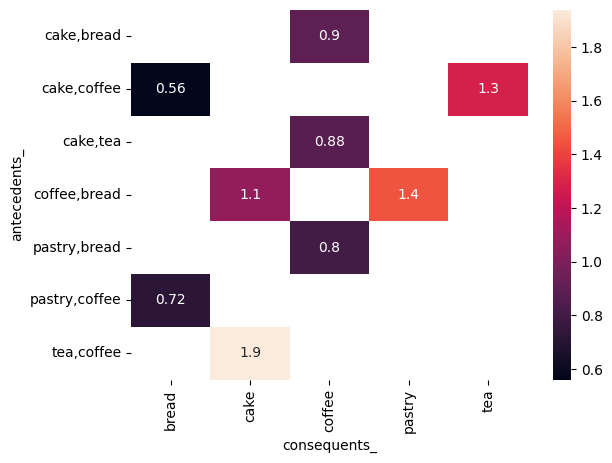

In [28]:
apriori_rules['lhs_items'] = apriori_rules['antecedents'].apply(lambda x:len(x) )
apriori_rules[apriori_rules['lhs_items']>1].sort_values('lift', ascending=False).head()
apriori_rules['antecedents_'] = apriori_rules['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_rules['consequents_'] = apriori_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = apriori_rules[apriori_rules['lhs_items']>1].pivot(index = 'antecedents_', columns = 'consequents_',
values= 'lift')
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Pembentukan dictionary untuk visualisasi plot

In [29]:
apriori_vis = rules

apriori_vis['uni'] = np.nan
apriori_vis['ant'] = np.nan
apriori_vis['con'] = np.nan
apriori_vis['tot'] = 20507

transactions = [a[1]['Item'].tolist() for a in list(df.groupby(['Transaction', 'Datetime']))]

def tran():
    for t in transactions:
        yield t
def antec(x):
    cnt = 0
    for t in tran():
        t = set(t)
        if x.intersection(t) == x:
            cnt = cnt + 1
    return cnt
vis = apriori_vis.values.tolist()

rules_dict = []
for i in vis:
    i[10] = antec(i[0])
    i[11] = antec(i[1])
    i[9] = antec(i[0].union(i[1]))
    diction = {
        'lhs': tuple(i[0]),
        'rhs': tuple(i[1]),
        'count_full': i[9],
        'count_lhs': i[10],
        'count_rhs': i[11],
        'num_transactions': i[12]
    }
    rules_dict.append(diction)

## PLot Visualization

In [30]:
rules = []
for rd in rules_dict:
    rules.append(generate_rule_from_dict(rd))
    
PyARMViz.adjacency_parallel_coordinate_plot(rules)

NameError: name 'generate_rule_from_dict' is not defined